# Creador de instancias segun Martello y Toth: Knapsack libro

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generar_instancia_uncorrelated(n,v):
    weights = np.random.randint(1,v+1, size=n)
    prices = np.random.randint(1,v+1, size=n)
    return weights, prices

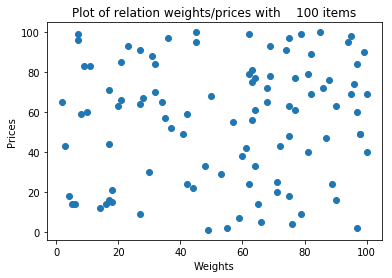

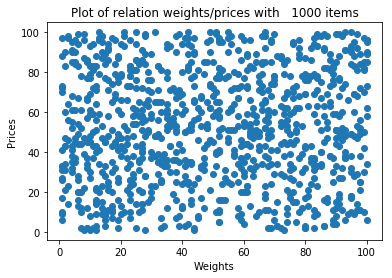

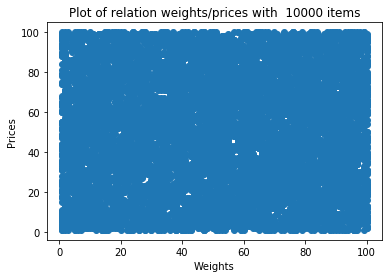

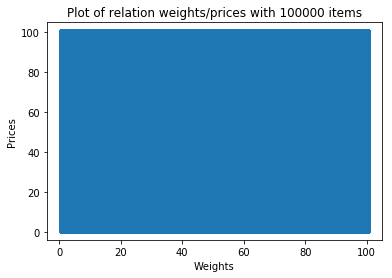

In [3]:
for i in [100,1000,10000,100000]:
    weights, prices = generar_instancia_uncorrelated(i,100)
    plt.scatter(weights,prices)
    plt.title("Plot of relation weights/prices with %6d items" %(i))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [4]:
def generar_instancia_weakly_correlated(n,v,r):
    weights = np.random.randint(1,v+1, size=n)
    prices = np.array([np.random.randint(
        weights[i] - r, weights[i] + r + 1, size = 1) 
                         for i in range(len(weights))])
    return weights, prices

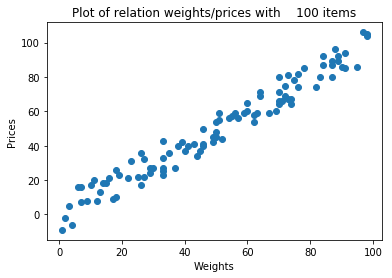

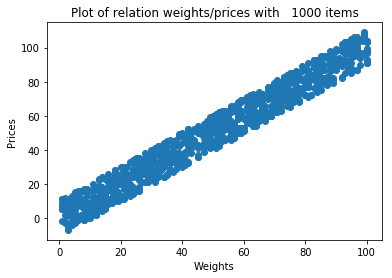

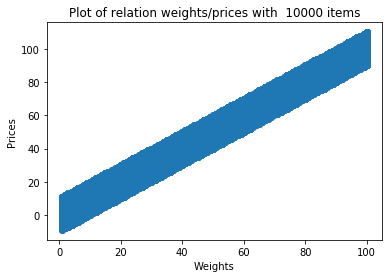

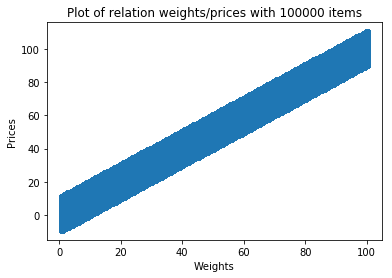

In [5]:
for i in [100,1000,10000,100000]:
    weights, prices = generar_instancia_weakly_correlated(i,100,10)
    plt.scatter(weights,prices)
    plt.title("Plot of relation weights/prices with %6d items" %(i))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [6]:
def generar_instancia_correlated(n,v,r):
    weights = np.random.randint(1,v+1, size=n)
    prices = np.array([weights[i] + r 
                         for i in range(len(weights))])
    return weights, prices

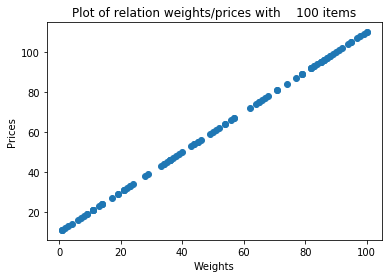

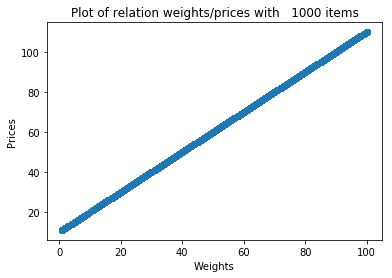

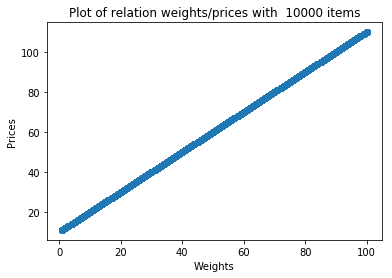

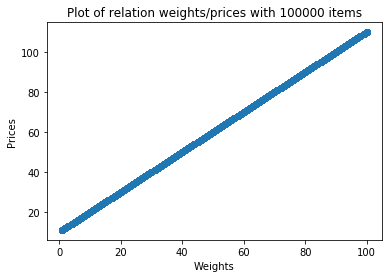

In [7]:
for i in [100,1000,10000,100000]:
    weights, prices = generar_instancia_correlated(i,100,10)
    plt.scatter(weights,prices)
    plt.title("Plot of relation weights/prices with %6d items" %(i))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [8]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [9]:
for func in [generar_instancia_uncorrelated,
             generar_instancia_weakly_correlated,
             generar_instancia_correlated]:
    pearsons =[]
    for i in range(10):
        if func == generar_instancia_uncorrelated:
            weights, prices = func(100,100)
        else:
            weights, prices = func(100,100,10)
        temp = pearson_def(weights, prices)
        pearsons.append(temp)
        #print(temp)
    print(str(func),"Prom:",sum(pearsons)/float(len(pearsons)))

<function generar_instancia_uncorrelated at 0x10cf30ae8> Prom: 0.0008191992196298688
<function generar_instancia_weakly_correlated at 0x114d410d0> Prom: [0.97880922]
<function generar_instancia_correlated at 0x1152d5378> Prom: 1.0


# Creación de instancias según NORTA

In [10]:
from scipy.stats import norm
def gen_instances_from_NORTA(m,n,R,v,r):
    """
    m: dimensiones
    n: número de muestras
    R: matriz de correlaciones deseada
    weights \in [1,v]
    prices \in [r,v+r]
    """
    L = np.linalg.cholesky(R) #lower
    W = np.random.normal(0, 1, (m,n))
    Z = np.dot(L,W)
    X = np.empty([m, n])
    #print(np.shape(X))
    for i in range(n):
        X[0,i] = int(float(v-1)*norm.cdf(Z[0,i])+float(1.0))
        X[1,i] = int(float(v)*norm.cdf(Z[1,i])+float(r))
    return X

Correlation Matriz:
 [[1, 0.1], [0.1, 1]]


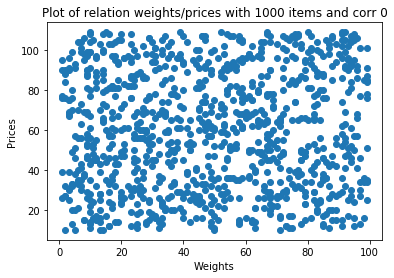

Correlation Matriz:
 [[1, 0.5], [0.5, 1]]


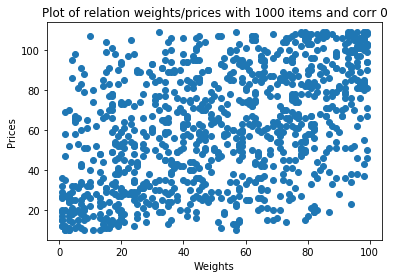

Correlation Matriz:
 [[1, 0.7], [0.7, 1]]


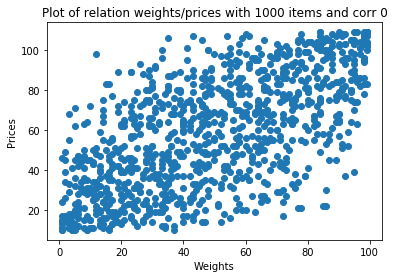

Correlation Matriz:
 [[1, 0.9], [0.9, 1]]


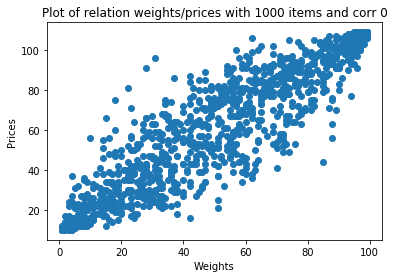

Correlation Matriz:
 [[1, 0.99], [0.99, 1]]


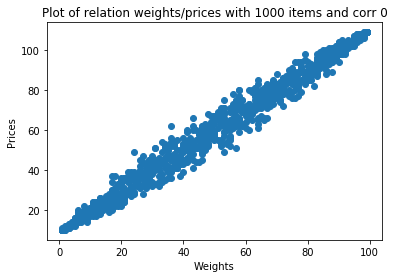

Correlation Matriz:
 [[1, 0.999999999], [0.999999999, 1]]


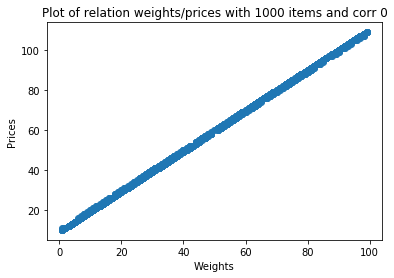

In [11]:
for corr in [0.1,0.5,0.7,0.9,0.99,0.999999999]: #corr: Correlación deseada
    R = [[1, corr],[corr, 1]]
    print("Correlation Matriz:\n",R)
    Z = gen_instances_from_NORTA(2,1000,R,100,10)
    plt.scatter(Z[0,:],Z[1,:])
    plt.title("Plot of relation weights/prices with 1000 items and corr %d" %(corr))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [28]:
def gen_instances_from_NORTA_uniform(n,R,lw,uw,lp,up):
    """
    m: dimensiones, definida como 2
    n: número de muestras
    R: matriz de correlaciones deseada
    weights \in [lw,uw]
    prices \in [lp,up]
    """
    L = np.linalg.cholesky(R) #lower
    W = np.random.normal(0, 1, (2,n))
    Z = np.dot(L,W)
    #weights = np.empty(n, dtype = int)
    #prices = np.empty(n, dtype = int)
    #weights_prices = np.empty((2*n), dtype = int)
    weights_prices = [0] * (2*n)
    for i in range(n):
        #weights[i] = int(float(uw-lw)*norm.cdf(Z[0,i])+float(lw))
        #prices[i] = int(float(up-lp)*norm.cdf(Z[1,i])+float(lp))
        weights_prices[i] = int(float(uw-lw)*norm.cdf(Z[0,i])+float(lw))
        weights_prices[n+i] = int(float(up-lp)*norm.cdf(Z[1,i])+float(lp))
    #return weights, prices
    return weights_prices

In [ ]:
N_ELEMENTOS = [100, 200, 300, 500, 800, 1000, 1200, 1500, 2000]
CAPACIDADES = [1100, 1500, 1700, 2000, 5000, 10000, 14000, 16000]
correlaciones = [0.1,0.3,0.5,0.7,0.8,0.9,0.95,0.999999] #correlacion deseada
lower_weight = [5,10,15,50,70,100,150]
upper_weight = [20,30,50,70,100,180,200]
lower_price = [30,50,60,80,100,140,350]
upper_price = [70,80,90,150,200,300,500]
id = 10000
for lw in lower_weight:
    for uw in upper_weight:
        for lp in lower_price:
            for up in upper_price:
                if up>lp and uw>lw:
                    for corr in correlaciones:
                        for ele, cap in zip(N_ELEMENTOS, CAPACIDADES):
                            f = open('U_'+str(ele)+'_'+str(cap)+'_'+str(corr)+'_'+
                                     str(lw)+'_'+str(uw)+'_'+str(lp)+'_'+str(up),'w')
                            print(id, ele, cap, file=f, end = ' ') #cambiar 1000 por numero de instancia
                            #weights, prices = gen_instances_from_NORTA_uniform(ele,[[1, corr],[corr, 1]],lw,uw,lp,up)
                            weights_prices = gen_instances_from_NORTA_uniform(ele,[[1, corr],[corr, 1]],lw,uw,lp,up)
                            #print(weights_prices)
                            #print(weights, sep=' ', file=f)
                            #print(prices, sep=' ', file=f)
                            print(*weights_prices, sep=' ', file=f)
                            id +=1

In [59]:
from scipy.stats import truncnorm

def gen_instances_from_NORTA_truncnormal(n,R,lw,uw,muw,sigmaw,lp,up,mup,sigmap):
    """
    n: número de muestras
    R: matriz de correlaciones deseada
    weights distributed normal(mu=muw,desv=sigmaw) trucated \in [lw,uw]
    prices distributed normal(mu=mup,desv=sigmap) trucated \in [lp,up]
    """
    L = np.linalg.cholesky(R) #lower
    W = np.random.normal(0, 1, (2,n))
    Z = np.dot(L,W)
    weights_prices = [0] * (2*n)
    aw, bw = (lw - muw) / sigmaw, (uw - muw) / sigmaw
    ap, bp = (lp - mup) / sigmap, (up - mup) / sigmap
    for i in range(n):
        weights_prices[i] = int(truncnorm.ppf(q=norm.cdf(Z[0,i]),a=aw,b=bw,loc=muw,scale=sigmaw))
        weights_prices[n+i] = int(truncnorm.ppf(q=norm.cdf(Z[1,i]),a=ap,b=bp,loc=mup,scale=sigmap))
    return weights_prices

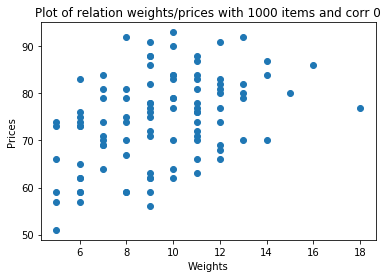

In [65]:
#una prueba con dos normales
muw,sigmaw,mup,sigmap = 10,3,75,10
weights_prices = gen_instances_from_NORTA_truncnormal(ele,[[1, corr],[corr, 1]],lw,uw,muw,sigmaw,lp,up,mup,sigmap)
#print(len(weights_prices),len(weights_prices[:ele]),len(weights_prices[ele:]))
plt.scatter(weights_prices[:ele],weights_prices[ele:])
plt.title("Plot of relation weights/prices with 1000 items and corr %d" %(corr))
plt.xlabel("Weights")
plt.ylabel("Prices")
plt.show()